<a href="https://colab.research.google.com/github/sai-tej31/Face-Expression-Detection/blob/master/INTERNSHALA_0820_ASSIGN1_SAITEJAREDDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recogonition





* Let's install face recognition package by using the below command

```
!pip install face_recognition
```



In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 102kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=d2932e23fc364240586358661ee8b72eea9a15d457c9824f1b4356c40bd9763c
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


* Let us mount our google drive to access files(images) and use below code to get access form the respective directory


```
cd <filepath>
```



In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
cd "/content/gdrive/My Drive/ASSIGNMENT"

/content/gdrive/My Drive/ASSIGNMENT


## Let us import all the necessary libraries 

In [4]:
import face_recognition
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
from skimage.feature import hog
from skimage import data , exposure
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Histogram of oriented gradients
* The histogram of oriented gradients (HOG) is a feature descriptor used in computer vision and image processing for the purpose of object detection. The technique counts occurrences of gradient orientation in localized portions of an image. 

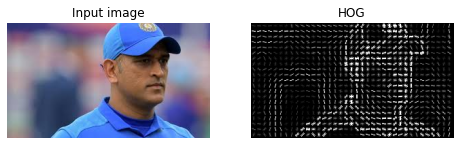

In [5]:


image = cv2.imread('dhoni2.jfif')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


fd , hog_image = hog(image,orientations=8,pixels_per_cell=(8,8),
                     cells_per_block=(1,1),visualize = True,multichannel=True)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)

ax1.axis('off')
ax1.imshow(image,cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image,in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled,cmap=plt.cm.gray)
ax2.set_title('HOG')

plt.show()

* Let's use face recognition package to find if any face is present in the image

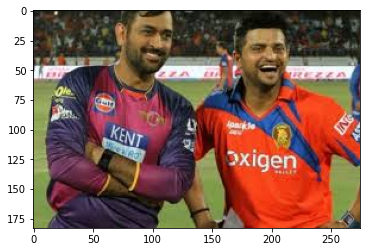

In [6]:
image = cv2.imread('raina_dhoni1.jfif')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [7]:
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print("{} Faces ".format(number_of_faces))

2 Faces 


* using matplotlib let's plot rectangle on faces

Locations Top:17,Left:175,bottom:60,Right:218
Locations Top:2,Left:79,bottom:46,Right:122


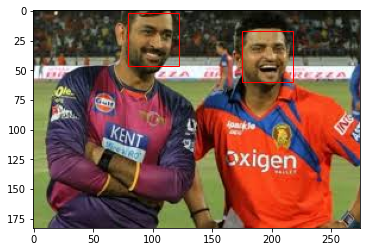

In [8]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  print("Locations Top:{},Left:{},bottom:{},Right:{}".format(y,x,h,w))
  rect =Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)

plt.show()

## Face Encodings
* Store all the known encodings in known face encodings and check with the unknown image to find if it's a known one.

In [9]:
image = cv2.imread('raina_main.jfif')
raina = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('dhoni1.jfif')
dhoni = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

image = cv2.imread('rohith1.jfif')
rohit = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

raina_encoding = face_recognition.face_encodings(raina)[0]
dhoni_encoding = face_recognition.face_encodings(dhoni)[0]
rohit_encoding = face_recognition.face_encodings(rohit)[0]

known_face_encodings = [raina_encoding,dhoni_encoding,rohit_encoding]


(183, 275, 3)


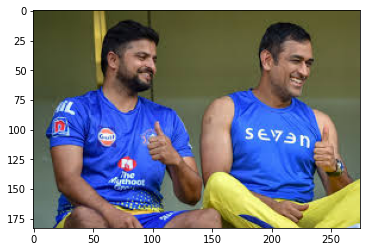

In [10]:

unknown_image = "raina_dhoni.jfif"
unknown_image = cv2.imread(unknown_image)
print(unknown_image.shape)

unknown_image = cv2.cvtColor(unknown_image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

found Dhoni in the photo
found Suresh Raina in the photo


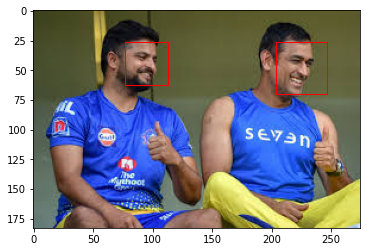

In [11]:
for unknown_face_encoding in unknown_face_encodings:
  results = face_recognition.compare_faces(known_face_encodings,unknown_face_encoding,tolerance=0.6)
  
  name = "unknown"

  if results[0]:
    name = "Suresh Raina"
  elif results[1]:
    name = "Dhoni"
  elif results[2]:
    name = "Rohit"
  
  print( f"found {name} in the photo")
  plt.imshow(unknown_image)
  ax = plt.gca()
face_locations = face_recognition.face_locations(unknown_image)

for face_location in face_locations:
  top,right,bottom,left = face_location
  x,y,w,h = left,top,right,bottom
  rect =Rectangle((x,y),w-x,h-y,fill=False,color='red')
  ax.add_patch(rect)

plt.show()  


## Kindly check my work 
I have worked on few projects on kaggle and few on jupyter notebook and uploaded the same in github,please have a look.
* [Kaggle](./https://www.kaggle.com/saitej31)
* [Git-Hub](./https://github.com/sai-tej31)
Looking forward to working with you